# 5.2 Exercises: Heat Maps, Spatial Charts, and Contour Charts - Python
Michael Hotaling

In [1]:
# Standard Packages
import pandas as pd
import numpy as np

# Spatial Packages
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs

# Graphing
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
from sklearn.preprocessing import MinMaxScaler

# Heat Maps

In [2]:
df = pd.read_csv("ppg2008.csv")
df.columns = df.columns.str.strip()

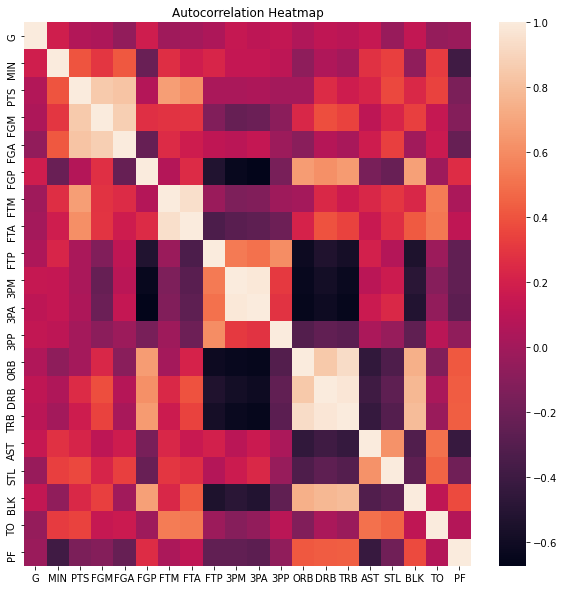

In [3]:
fig, ax = plt.subplots(figsize =(10,10))
sns.heatmap(df.drop(['Name'], axis = 1).corr(), ax = ax)
plt.title("Autocorrelation Heatmap")
plt.show()

In [4]:
df.drop(['Name'], axis = 1).corr().to_csv("basket_ball_corr.csv")

In [5]:
scaler = MinMaxScaler().fit_transform(df.drop(['Name'], axis = 1))

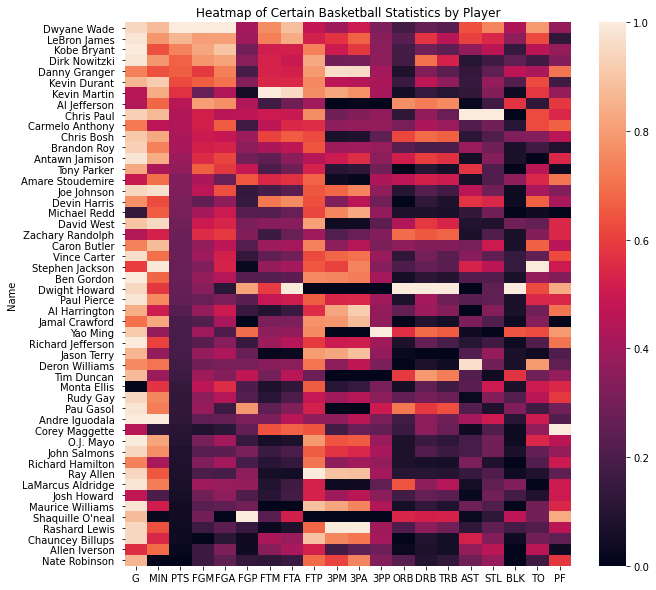

In [6]:
fig, ax = plt.subplots(figsize =(10,10))
sns.heatmap(pd.DataFrame(scaler, columns= df.columns[1:], index = df['Name']), ax = ax)
plt.title("Heatmap of Certain Basketball Statistics by Player")
plt.show()

In [7]:
pd.DataFrame(scaler, columns= df.columns[1:], index = df['Name']).to_csv("basketball.csv")

In [8]:
contiguous_usa = gpd.read_file(gplt.datasets.get_path('contiguous_usa'))

In [9]:
df = pd.read_csv("costcos-geocoded.csv")
#df = df[~df['State'].isin(['Alaska','Hawaii'])]
df.head()

,Address,City,State,Zip Code,Latitude,Longitude
0,1205 N. Memorial Parkway,Huntsville,Alabama,35801-5930,34.743095,-86.600955
1,3650 Galleria Circle,Hoover,Alabama,35244-2346,33.377649,-86.812420
2,8251 Eastchase Parkway,Montgomery,Alabama,36117,32.363889,-86.150884
3,5225 Commercial Boulevard,Juneau,Alaska,99801-7210,58.359200,-134.483000
4,330 West Dimond Blvd,Anchorage,Alaska,99515-1950,61.143266,-149.884217


In [10]:
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df['Longitude'], df['Latitude']))

# Spatial Charts

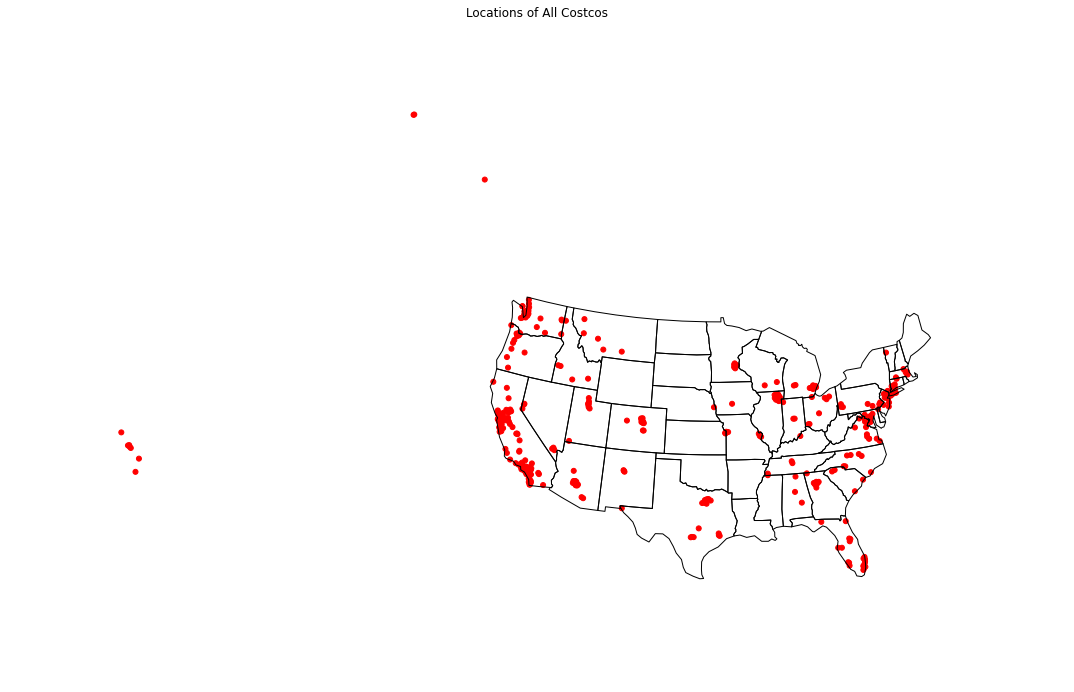

In [11]:
ax = gplt.polyplot(contiguous_usa, 
                   projection=gcrs.AlbersEqualArea(), 
                   figsize = (19,16), 
                   zorder = 2)
gplt.pointplot(gdf,
               color = 'red', 
               zorder = 1, 
               ax = ax)
plt.title("Locations of All Costcos")
plt.show()

C:\Users\hotal\anaconda3\envs\geo_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hotal\anaconda3\envs\geo_env\lib\site-packages\seaborn\distributions.py:1676: UserWarning: `shade_lowest` is now deprecated in favor of `thresh`. Setting `thresh=0.05`, but please update your code.
  warnings.warn(msg, UserWarning)


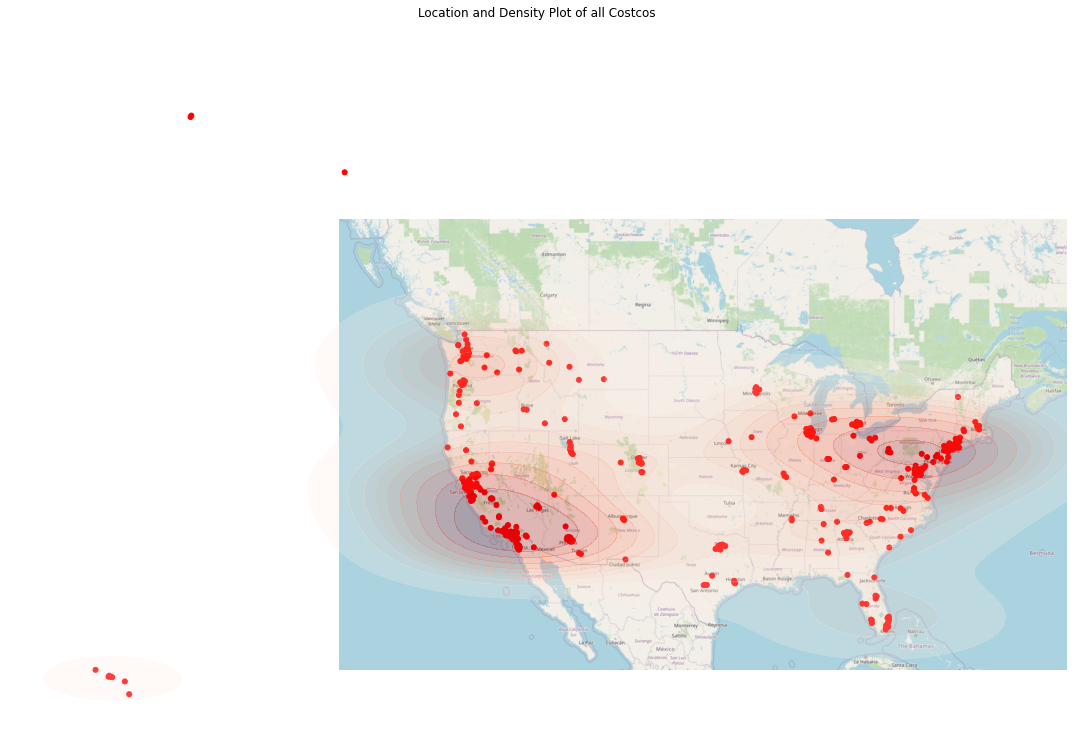

In [12]:
ax = gplt.webmap(df = contiguous_usa, 
                 projection=gcrs.WebMercator(), 
                 figsize = (19,16), 
                 zorder = 2)
gplt.pointplot(df = gdf, color = 'red', zorder = 1, ax = ax)
gplt.kdeplot(df = gdf, 
             cmap = 'Reds',
             thresh = 0.05,
             shade=True, 
             projection=gcrs.AlbersEqualArea(), 
             ax = ax, 
             alpha = 0.25)
plt.title("Location and Density Plot of all Costcos")
plt.show()

In [13]:
gdf2 = pd.DataFrame(gdf['State'].value_counts()).reset_index()
gdf2.columns = ['State','Count']

In [14]:
geodata = contiguous_usa.merge(gdf2, how='outer', left_on=['state'], right_on=['State'])

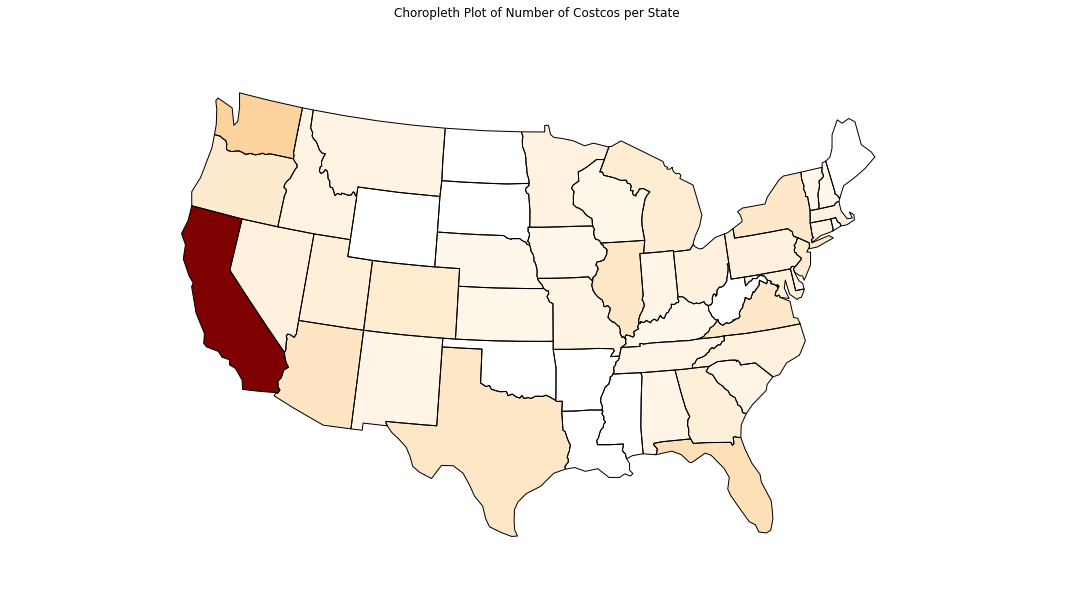

In [15]:
ax = gplt.polyplot(contiguous_usa, 
                   projection=gcrs.AlbersEqualArea(), 
                   figsize = (19,16), 
                   zorder = 2)
gplt.choropleth(geodata, 
                hue = geodata['Count'], 
                cmap = 'OrRd',
                projection=gcrs.WebMercator(), 
                ax = ax)
plt.title("Choropleth Plot of Number of Costcos per State")
plt.show()

In [16]:
gdf2 = pd.DataFrame(gdf['State'].value_counts()).reset_index()
gdf2.columns = ['State','Count']
gdf2.to_csv("costco_states.csv")

# Contour Charts

In [17]:
def f(x, y):
    return -np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [18]:
x = np.linspace(0.1, 5, 50)
y = np.linspace(0.1, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

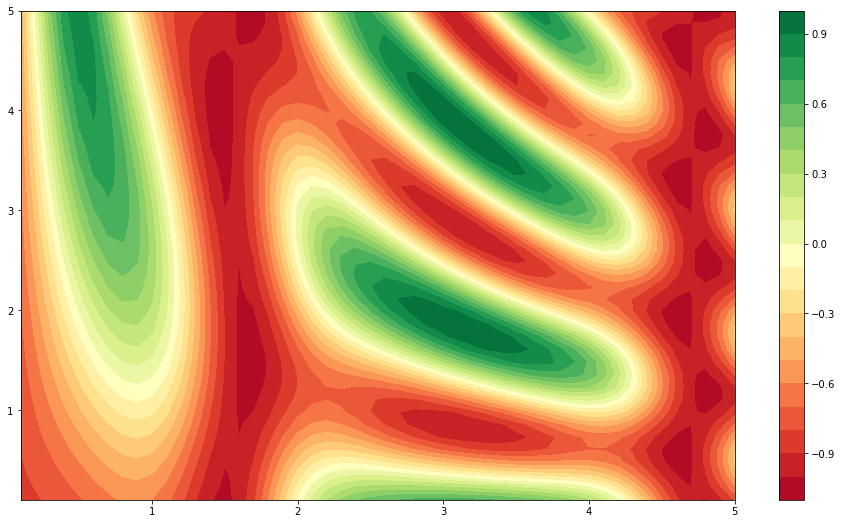

In [19]:
plt.figure(figsize=(16,9))
plt.contourf(X, Y, Z, 20, cmap='RdYlGn')
plt.colorbar();

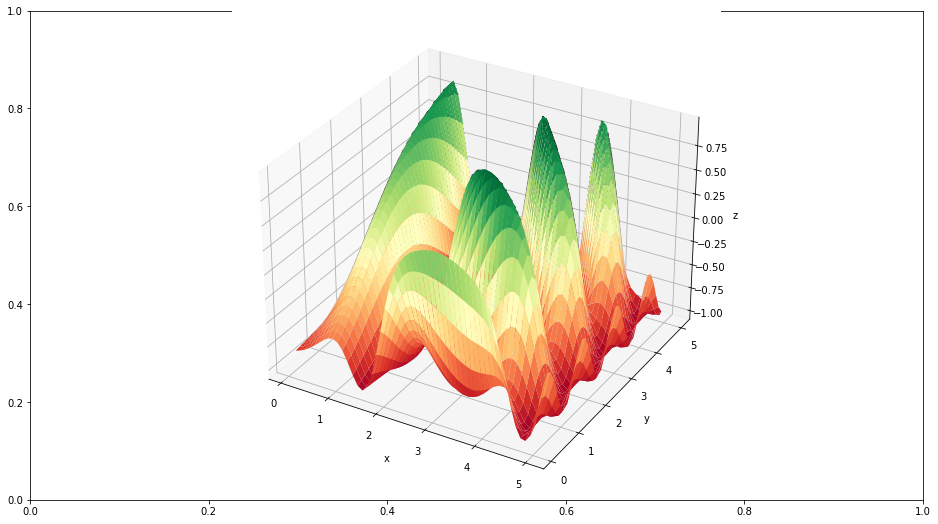

In [20]:
fig, ax  = plt.subplots(figsize=(16,9))
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 40, cmap='Greys')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='RdYlGn', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');